# Question3

## 3.1 - Training

### 3.1.1 - Resize Images

In [39]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

images = []

# TODO: check if grayscale is correct for HoG

# Read in each image, convert to Gray and resize, then append to list
for i in range(1,15):
    img_temp = cv2.imread("./car"+str(i)+".jpg")
    img_temp = cv2.cvtColor(img_temp, cv2.COLOR_BGR2GRAY) 
    img_temp = cv2.resize(img_temp, (128,128))
    images.append(img_temp)

## TESTING PURPOSES -> REMOVE

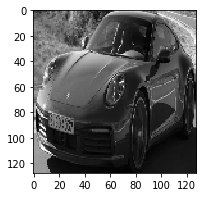

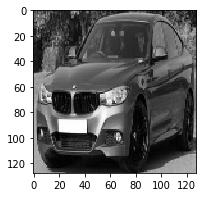

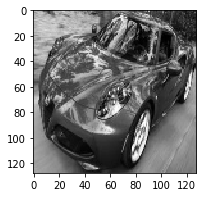

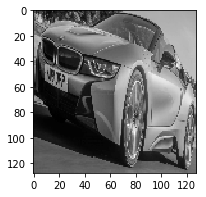

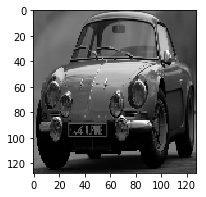

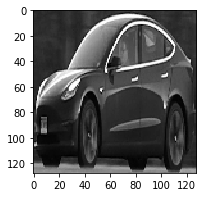

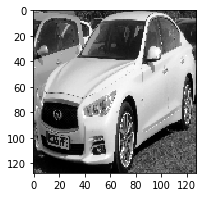

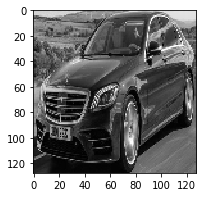

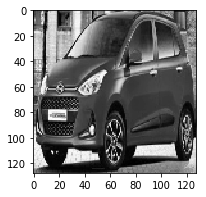

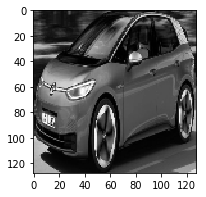

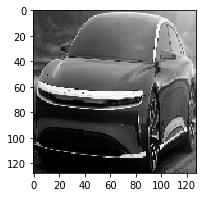

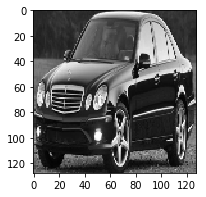

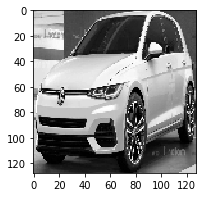

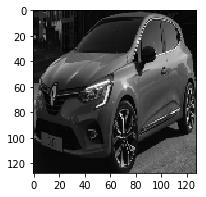

In [40]:
# !! FOR TESTING PURPOSES -- TO REMOVE
for img in images:
    plt.figure(figsize=(3,3))
    plt.xticks(np.arange(0,140, step=20))
    plt.imshow(img, cmap='gray')
    
    # Check 128x128
    if(img.shape[0]!=128 or img.shape[1]!=128):
        raise Exception('Images wrong size!')
plt.show()



### 3.1.2 - Compute HoG features

In [41]:
# Make a function which takes list of images as arguments
# and delivers list of HoG features as output. 

def hog_features(imgs_arr, cell_size=(4,4), block_size=(2,2), nbins=9):
    hog_feats_arr = []
    count = 0
    for img in imgs_arr:
        # Check window size
        if(img.shape[0]%16!=0 or img.shape[1]%16!=0):
            raise Exception('Invalid Image Size')
        else:
            # Compute window size
            win_XY = img.shape[0] // cell_size[0] * cell_size[1]
            
            # Compute blocks
            block_XY = block_size[0] * cell_size[0]
            
            # Create HoG object
            hog = cv2.HOGDescriptor(_winSize = (win_XY, win_XY),
                                    _blockSize = (block_XY, block_XY),
                                    _blockStride = (cell_size[1], cell_size[0]),
                                    _cellSize = (cell_size[1], cell_size[0]),
                                    _nbins = nbins
                                   )
            
            # Compute number of cells 
            n_cells = (img.shape[0] // cell_size[0], img.shape[1] // cell_size[1])
            
            # Compute HoG features
            hog_feats = hog.compute(img) \
                            .reshape(n_cells[1] - block_size[1] + 1,
                                     n_cells[0] - block_size[0] +1, 
                                     block_size[1], block_size[0], nbins) \
                            .transpose((1, 0, 3, 2, 4))
            
            hog_feats_arr.append(hog_feats)
            
    return hog_feats_arr
            
feats = hog_features(images)

## TESTING PURPOSES -> REMOVE

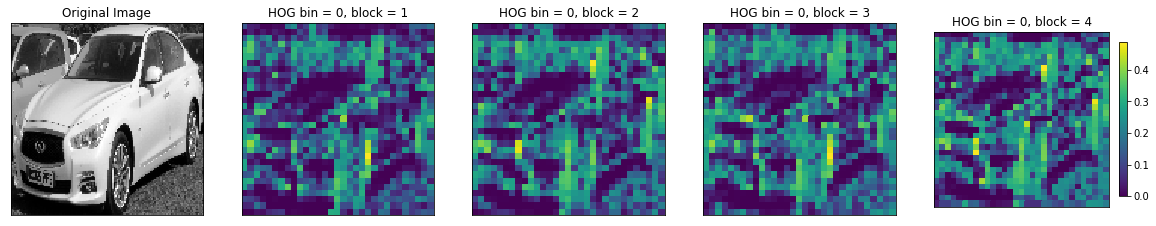

In [42]:
# !! FOR TESTING PURPOSES -- TO REMOVE

# Show the first 4 HoG blocks for image i 
i = 6

plt.figure(figsize = (20,100))
plt.subplot(151)
plt.imshow(images[i], cmap='gray')
plt.title("Original Image"), plt.xticks([]), plt.yticks([])

plt.subplot(152)
plt.pcolor(feats[i][:, :, 0,0,0])
plt.gca().invert_yaxis()
plt.gca().set_aspect('equal', adjustable='box')
plt.title("HOG bin = 0, block = 1"), plt.xticks([]), plt.yticks([])

plt.subplot(153)
plt.pcolor(feats[i][:, :, 0,1,0])
plt.gca().invert_yaxis()
plt.gca().set_aspect('equal', adjustable='box')
plt.title("HOG bin = 0, block = 2"), plt.xticks([]), plt.yticks([])

plt.subplot(154)
plt.pcolor(feats[i][:, :, 1,0,0])
plt.gca().invert_yaxis()
plt.gca().set_aspect('equal', adjustable='box')
plt.title("HOG bin = 0, block = 3"), plt.xticks([]), plt.yticks([])

plt.subplot(155)
plt.pcolor(feats[i][:, :, 1,1,0])
plt.gca().invert_yaxis()
plt.gca().set_aspect('equal', adjustable='box')
plt.title("HOG bin = 0, block = 4"), plt.xticks([]), plt.yticks([])
plt.colorbar(fraction=0.04)
plt.show()

### 3.1.3 - Calculate mean feature map across training images

In [43]:
# Map the HoGs
# Do we iterate over each HoG and take the average??

# Should still have 4 blocks

height, width = feats[0][:,:,0,0,0].shape
blocks_avg = []

for l in range(2):
    for k in range(2):
        block_avg = np.zeros((height, width))
        for h in range(height):
            pixel_sum = 0
            for w in range(width):
                for i in range(len(feats)):
                    pixel_sum = feats[i][:,:,k,l,0][h][w]
                pixel_avg = pixel_sum / (len(feats))
                block_avg[w][h]= pixel_avg
                
        blocks_avg.append(block_avg)

### TESTS - Testing avg blocks output

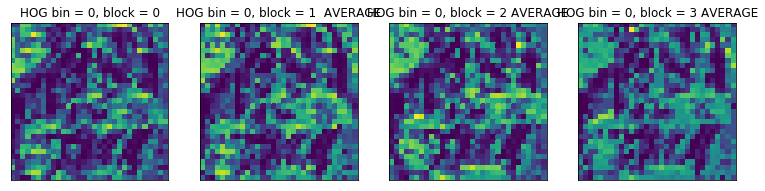

In [44]:
plt.figure(figsize=(13,13))
plt.subplot(141)
plt.pcolor(blocks_avg[0])
plt.gca().invert_yaxis()
plt.gca().set_aspect('equal', adjustable='box')
plt.title("HOG bin = 0, block = 0"), plt.xticks([]), plt.yticks([])

plt.subplot(142)
plt.pcolor(blocks_avg[1])
plt.gca().invert_yaxis()
plt.gca().set_aspect('equal', adjustable='box')
plt.title("HOG bin = 0, block = 1  AVERAGE"), plt.xticks([]), plt.yticks([])

plt.subplot(143)
plt.pcolor(blocks_avg[2])
plt.gca().invert_yaxis()
plt.gca().set_aspect('equal', adjustable='box')
plt.title("HOG bin = 0, block = 2 AVERAGE"), plt.xticks([]), plt.yticks([])

plt.subplot(144)
plt.pcolor(blocks_avg[3])
plt.gca().invert_yaxis()
plt.gca().set_aspect('equal', adjustable='box')
plt.title("HOG bin = 0, block = 3 AVERAGE"), plt.xticks([]), plt.yticks([])
plt.show()

### 3.1.4 - Repeat steps 3.1.2 - 3.1.3 for images flipped vertically

In [51]:
imgs_flip = []

# Flip image about the vertical axis -> ie across y-axis
for img in images:
    imgs_flip.append(cv2.flip(img, 1))
    
feats_flipped = hog_features(imgs_flip)

# TODO: Calculate mean feature map

height, width = feats[0][:,:,0,0,0].shape
blocks_avg_rotated = []

for l in range(2):
    for k in range(2):
        block_avg = np.zeros((height, width))
        for h in range(height):
            pixel_sum = 0
            for w in range(width):
                for i in range(len(feats_flipped)):
                    pixel_sum = feats_flipped[i][:,:,k,l,0][h][w]
                pixel_avg = pixel_sum / (len(feats))
                block_avg[w][h]= pixel_avg
                
        blocks_avg_rotated.append(block_avg)
        

### TESTS - Display output

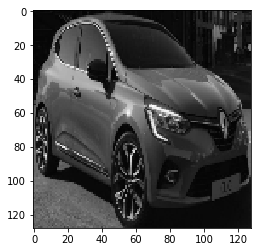

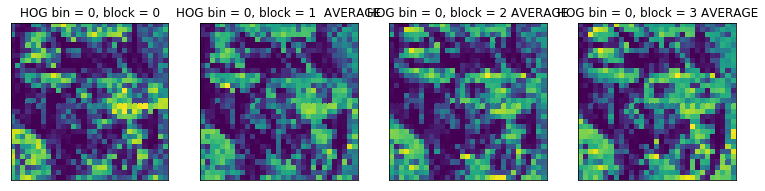

In [52]:
for imgs_flip in imgs_flip:
    plt.imshow(imgs_flip,cmap='gray')
plt.show()


plt.figure(figsize=(13,13))
plt.subplot(141)
plt.pcolor(blocks_avg_rotated[0])
plt.gca().invert_yaxis()
plt.gca().set_aspect('equal', adjustable='box')
plt.title("HOG bin = 0, block = 0"), plt.xticks([]), plt.yticks([])

plt.subplot(142)
plt.pcolor(blocks_avg_rotated[1])
plt.gca().invert_yaxis()
plt.gca().set_aspect('equal', adjustable='box')
plt.title("HOG bin = 0, block = 1  AVERAGE"), plt.xticks([]), plt.yticks([])

plt.subplot(143)
plt.pcolor(blocks_avg_rotated[2])
plt.gca().invert_yaxis()
plt.gca().set_aspect('equal', adjustable='box')
plt.title("HOG bin = 0, block = 2 AVERAGE"), plt.xticks([]), plt.yticks([])

plt.subplot(144)
plt.pcolor(blocks_avg_rotated[3])
plt.gca().invert_yaxis()
plt.gca().set_aspect('equal', adjustable='box')
plt.title("HOG bin = 0, block = 3 AVERAGE"), plt.xticks([]), plt.yticks([])
plt.show()

### 3.1.5 - Dsiplay 9 orientation channels for first block